# 5. AGRUPAMENTO HIERARQUICO

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
from matplotlib import patheffects

In [ ]:
# Selecionar as características relevantes para o agrupamento
caracteristicas = df_uni[['Frequencia', 'Valor_Total']]

In [ ]:
# Criar o modelo de Agrupamento Hierárquico Aglomerativo
modelo_agrupamento = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [ ]:
# Ajustar o modelo aos dados
modelo_agrupamento.fit(caracteristicas)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [ ]:
# Adicionar as colunas de cluster aos dados originais
df_uni['Cluster'] = modelo_agrupamento.labels_

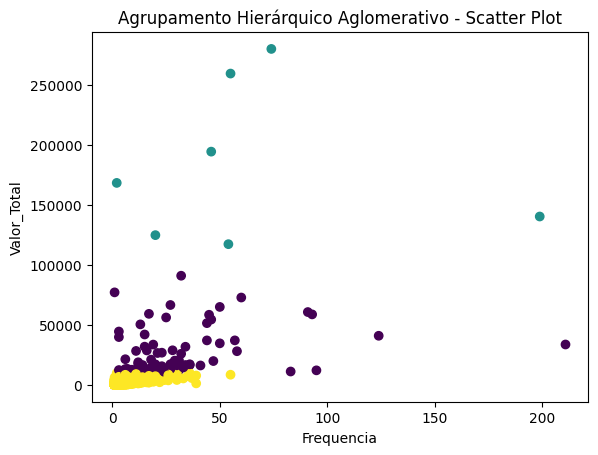

In [ ]:
# Visualizar os resultados
#plt.scatter(df_uni['Frequencia'], df_uni['Valor_Freq'], c=df_uni['Cluster'], cmap='viridis')

# Plotar o scatter plot
plt.scatter(df_uni['Frequencia'], df_uni['Valor_Total'], c=df_uni['Cluster'], cmap='viridis', marker='o')
plt.title('Agrupamento Hierárquico Aglomerativo - Scatter Plot')
plt.xlabel('Frequencia')
plt.ylabel('Valor_Total')
plt.show()

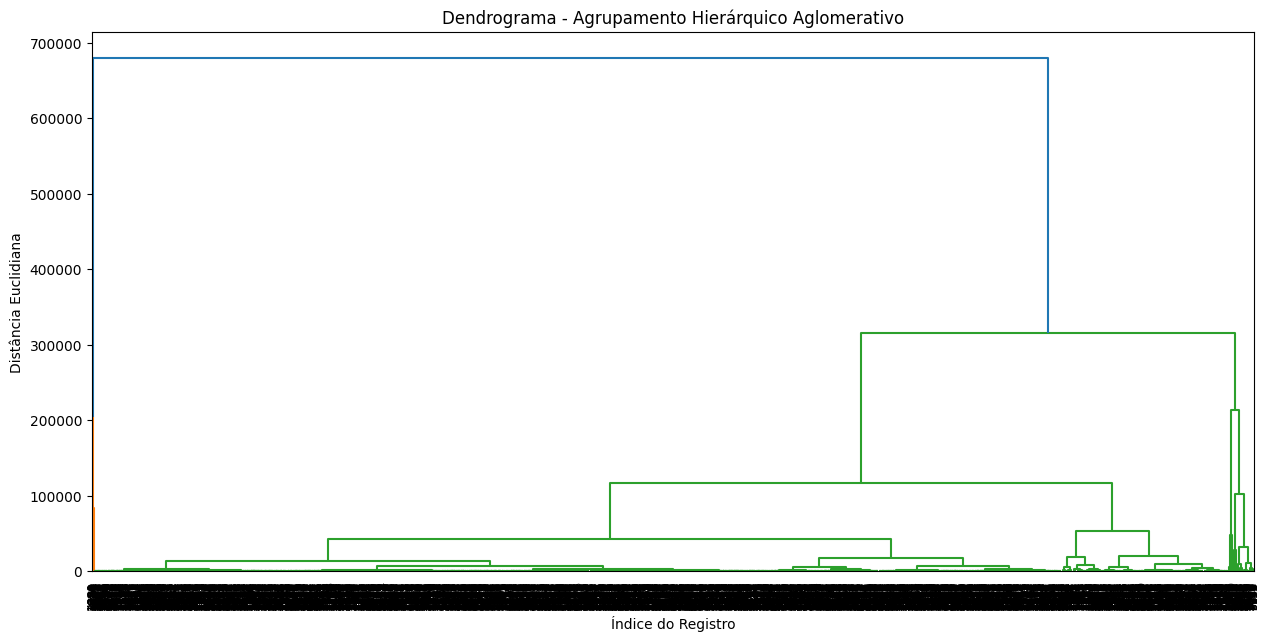

In [ ]:
# Plotar o dendrograma para visualização hierárquica
#modelo_agrupamento_dendrograma = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
#modelo_agrupamento_dendrograma = modelo_agrupamento_dendrograma.fit(caracteristicas)

# Calcular a matriz de ligação (linkage matrix)
matriz_ligacao = linkage(caracteristicas, 'ward')

# Plotar o dendrograma
plt.figure(figsize=(15, 7))
dendrogram(matriz_ligacao, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrograma - Agrupamento Hierárquico Aglomerativo')
plt.xlabel('Índice do Registro')
plt.ylabel('Distância Euclidiana')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


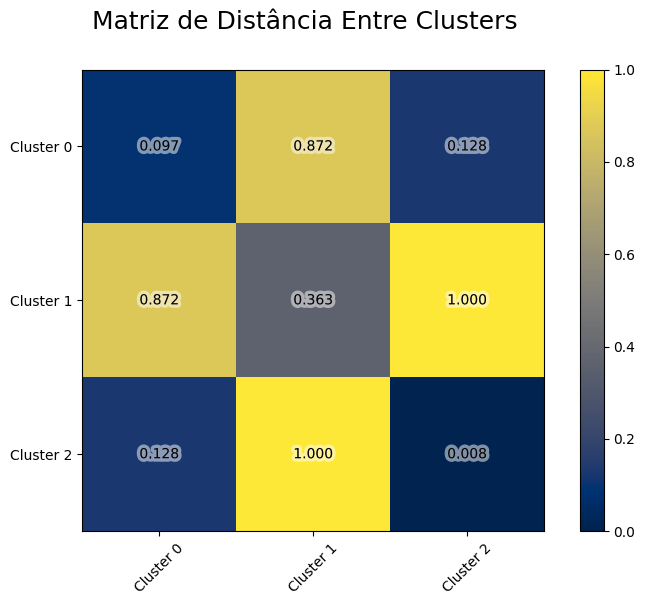

In [ ]:
# Calcular a matriz de distância entre os clusters
n_clusters = 3  # Número de clusters
labels = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward').fit_predict(caracteristicas)
dist_matrix = np.zeros((n_clusters, n_clusters))

for i in range(n_clusters):
    for j in range(n_clusters):
        dist_matrix[i, j] = pairwise_distances(
            caracteristicas[labels == i],
            caracteristicas[labels == j],
            metric='euclidean'
        ).mean()

# Normalizar a matriz de distância
dist_matrix /= dist_matrix.max()

# Plotar a matriz de distância entre os clusters
labels_str = [f'Cluster {i}' for i in range(n_clusters)]

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    for j in range(n_clusters):
        t = plt.text(
            i,
            j,
            f"{dist_matrix[i, j]:.3f}",
            verticalalignment="center",
            horizontalalignment="center",
        )
        t.set_path_effects(
            [patheffects.withStroke(linewidth=5, foreground="w", alpha=0.5)]
        )

plt.imshow(dist_matrix, interpolation="nearest", cmap="cividis", vmin=0)
plt.xticks(range(n_clusters), labels_str, rotation=45)
plt.yticks(range(n_clusters), labels_str)
plt.colorbar()
plt.suptitle("Matriz de Distância Entre Clusters", size=18, y=1)
plt.tight_layout()
plt.show()